<a href="https://colab.research.google.com/github/pauloesteban/Data-Science-with-Python/blob/master/DS_6_Clustering_Wines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [10]:
from sklearn.preprocessing import StandardScaler

In [16]:
from sklearn.cluster import KMeans

# Clustering

Unsupervised Learning

## Different Types of Clustering Algorithms


*   Centroid based models
*   Connectivity based models
*   Distribution based models
*   Density based models



# Centroid-based clustering

## K-means

In [ ]:
from sklearn.cluster import KMeans

## Distance Metric



*   **Euclidean** distance
*   Manhattan distance
*   Cosine distance



In [2]:
x1 = np.array([1, -1])
x2 = np.array([4, 3])
print(np.sqrt(((x1-x2)**2).sum()))

5.0


# Wine Data

Make predictions and reduce dimensionality

In [4]:
data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)
print(wine.shape)
print(wine.columns)

(178, 13)
Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


In [5]:
print(wine.iloc[:,:3].describe())

          alcohol  malic_acid         ash
count  178.000000  178.000000  178.000000
mean    13.000618    2.336348    2.366517
std      0.811827    1.117146    0.274344
min     11.030000    0.740000    1.360000
25%     12.362500    1.602500    2.210000
50%     13.050000    1.865000    2.360000
75%     13.677500    3.082500    2.557500
max     14.830000    5.800000    3.230000


In [7]:
print(wine.iloc[:,:3].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   alcohol     178 non-null    float64
 1   malic_acid  178 non-null    float64
 2   ash         178 non-null    float64
dtypes: float64(3)
memory usage: 4.3 KB
None


## Plotting

Exploratory data analysis

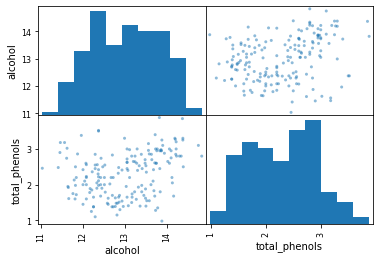

In [9]:
scatter_matrix(wine.iloc[:,[0,5]])
plt.show()

## Pre-processing: Standardization

In [11]:
X = wine[['alcohol', 'total_phenols']]

In [12]:
scale = StandardScaler()
scale.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
print(scale.mean_)
print(scale.scale_)

[13.00061798  2.29511236]
[0.80954291 0.62409056]


In [14]:
X_scaled = scale.transform(X)

In [15]:
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[ 7.84141790e-15 -1.95536471e-16]
[1. 1.]


# Modelling

## K-means modelling

Instantiate

In [17]:
kmeans = KMeans(n_clusters=3)

Fit

In [18]:
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Prediction

In [19]:
y_pred = kmeans.predict(X_scaled)
print(y_pred)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 1 1 1 2 1 2 1 0 2 0 2
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


Centroids

In [20]:
kmeans.cluster_centers_

array([[ 0.07498401, -1.14070754],
       [-1.06309124,  0.06418028],
       [ 0.92017418,  0.87087204]])

Visualize

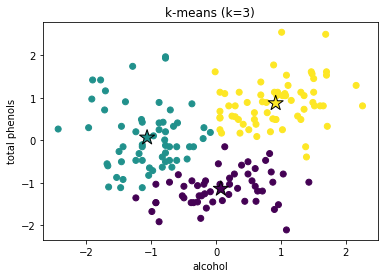

In [21]:
# plot the scaled data
plt.scatter(X_scaled[:,0], 
            X_scaled[:,1],
            c= y_pred)
# identify the centroids
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1], 
            marker="*",
            s = 250, 
            c = [0,1,2], 
            edgecolors='k')
plt.xlabel('alcohol'); plt.ylabel('total phenols')
plt.title('k-means (k=3)')
plt.show()

New data

In [22]:
X_new = np.array([[13, 2.5]])

In [23]:
X_new_scaled = scale.transform(X_new)
print(X_new_scaled)

[[-0.00076337  0.32829793]]


In [24]:
kmeans.predict(X_new_scaled)

array([2], dtype=int32)

## Optimal k: The elbow method

### Inertia

Sum of squares of the distance from data point to its nearest centroid

In [25]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)
print(kmeans.inertia_)

185.25081541190127


In [26]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
kmeans.inertia_

114.37290289645736

In [27]:
inertia = []
for i in np.arange(1, 11):
    km = KMeans(
        n_clusters=i
    )
    km.fit(X_scaled)
    inertia.append(km.inertia_)

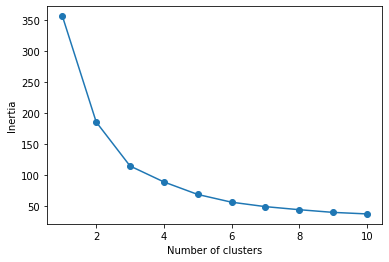

In [28]:
plt.plot(np.arange(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Optimal k when inertia does not decrease rapidly.

In [31]:
inertia = []
differ=[]
pre_inertia=0
for i in np.arange(1, 11):
    km = KMeans(
        n_clusters=i
    )
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    differ.append(km.inertia_-pre_inertia)
    pre_inertia=km.inertia_
print(differ)

[356.0, -170.74918458809873, -70.90407502879341, -25.743219641405858, -20.061814685620647, -12.546029171169849, -7.203771696614027, -4.313348524633284, -4.013338160492083, -3.2806986136300935]


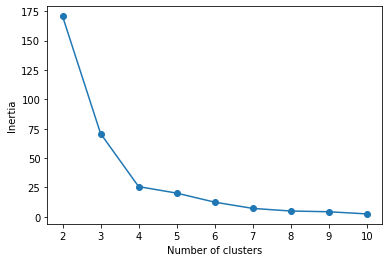

In [30]:
plt.plot(np.arange(2, 11), -np.diff(inertia), marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Modeling With More Features

In [32]:
X = wine

In [33]:
scale = StandardScaler() 
scale.fit(X)
X_scaled = scale.transform(X)

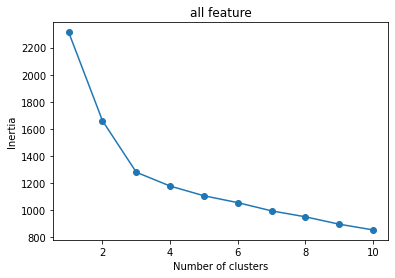

In [34]:
inertia = [] 
for i in np.arange(1, 11):
    km = KMeans(
        n_clusters=i 
        )
    km.fit(X_scaled) 
    inertia.append(km.inertia_)
plt.plot(np.arange(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("all feature")
plt.show()

In [35]:
k_opt = 3
kmeans = KMeans(k_opt)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)
print(y_pred)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
